In [6]:
#1. Data Preprocessing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

# launching the dataset
mydataset = pd.read_csv('insurance.csv')

# Displaying a preview of the dataset
print("\n" + "=" * 50)
print("Preview of the Data")
print("=" * 50)
print(tabulate(mydataset.head(), headers='keys', tablefmt='fancy_grid'))

# Identifying and eliminating rows with missing values
print("\n" + "=" * 50)
print("Total number of rows containing missing values:")
print("=" * 50)
print(mydataset.isnull().sum().sum())
mydataset = mydataset.dropna()

# Converting categorical variables into numerical representations
print("\n" + "=" * 50)
print("Converted Categorical Variables")
print("=" * 50)
mydataset = pd.get_dummies(mydataset, columns=['Gender', 'Smoker'], drop_first=True)
mydataset = pd.get_dummies(mydataset, columns=['Region'], prefix='Region', drop_first=True)

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
mydataset[['Age', 'BMI', 'Children', 'Expenses']] = scaler.fit_transform(mydataset[['Age', 'BMI', 'Children', 'Expenses']])

# Display the processed DataFrame
print("\n" + "=" * 50)
print("Processed Dataset")
print("=" * 50)
print(tabulate(mydataset.head(), headers='keys', tablefmt='fancy_grid'))



Preview of the Data
╒════╤═══════╤══════════╤═══════╤════════════╤══════════╤═══════════╤════════════╕
│    │   Age │ Gender   │   BMI │   Children │ Smoker   │ Region    │   Expenses │
╞════╪═══════╪══════════╪═══════╪════════════╪══════════╪═══════════╪════════════╡
│  0 │    19 │ female   │  27.9 │          0 │ yes      │ southwest │   16884.9  │
├────┼───────┼──────────┼───────┼────────────┼──────────┼───────────┼────────────┤
│  1 │    18 │ male     │  33.8 │          1 │ no       │ southeast │    1725.55 │
├────┼───────┼──────────┼───────┼────────────┼──────────┼───────────┼────────────┤
│  2 │    28 │ male     │  33   │          3 │ no       │ southeast │    4449.46 │
├────┼───────┼──────────┼───────┼────────────┼──────────┼───────────┼────────────┤
│  3 │    33 │ male     │  22.7 │          0 │ no       │ northwest │   21984.5  │
├────┼───────┼──────────┼───────┼────────────┼──────────┼───────────┼────────────┤
│  4 │    32 │ male     │  28.9 │          0 │ no       │ northwes

In [8]:
#2.splitting of data
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# separating the data into features and target
features = mydataset.drop('Expenses', axis=1)
target = mydataset['Expenses']

# Spliting the data into training and testing subsets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("\n" + "=" * 50)
print("Training Set")
print("=" * 50)
print(tabulate(features_train.head(), headers='keys', tablefmt='fancy_grid'))

print("\n" + "=" * 50)
print("Testing Set")
print("=" * 50)
print(tabulate(features_test.head(), headers='keys', tablefmt='fancy_grid'))



Training Set
╒══════╤═══════════╤══════════╤════════════╤═══════════════╤══════════════╤════════════════════╤════════════════════╤════════════════════╕
│      │       Age │      BMI │   Children │   Gender_male │   Smoker_yes │   Region_northwest │   Region_southeast │   Region_southwest │
╞══════╪═══════════╪══════════╪════════════╪═══════════════╪══════════════╪════════════════════╪════════════════════╪════════════════════╡
│ 1184 │ 0.108696  │ 0.336927 │   0.488889 │             0 │            1 │                  0 │                  1 │                  0 │
├──────┼───────────┼──────────┼────────────┼───────────────┼──────────────┼────────────────────┼────────────────────┼────────────────────┤
│  311 │ 0.0217391 │ 0.234501 │   0.481481 │             0 │            0 │                  0 │                  0 │                  1 │
├──────┼───────────┼──────────┼────────────┼───────────────┼──────────────┼────────────────────┼────────────────────┼────────────────────┤
│  210 │ 0.04

In [10]:
#3.gradient implementation
!pip install termcolor

import numpy as np
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
from termcolor import colored

extended_features = np.c_[np.ones((features_train.shape[0], 1)), features_train]
samples_count = features_train.shape[0]  
features_count = features_train.shape[1] + 1  

learning_rate = 0.01                  
max_iterations = 10000   
coefficients = np.random.randn(features_count, 1)

loss_history = []  
for iteration in range(max_iterations):
    gradients = 1/samples_count * extended_features.T.dot(extended_features.dot(coefficients) - target_train.values.reshape(-1, 1))
    coefficients = coefficients - learning_rate * gradients
    predictions = extended_features.dot(coefficients)
    mse = mean_squared_error(target_train, predictions)
    loss_history.append(mse)

print("\n" + colored("*" * 50, 'green'))
print(colored("Updated Coefficients and Intercept", 'green'))
print(colored("*" * 50, 'green'))
print(tabulate(coefficients, headers=[colored('Intercept', 'cyan')] + [colored(f'Feature {i}', 'cyan') for i in range(1, features_count)], tablefmt='fancy_grid'))

print("\n" + colored("*" * 50, 'yellow'))
print(colored("Loss History", 'yellow'))
print(colored("*" * 50, 'yellow'))
print(tabulate(enumerate(loss_history), headers=[colored('Iteration', 'cyan'), colored('MSE', 'cyan')], tablefmt='fancy_grid'))



**************************************************
Updated Coefficients and Intercept
**************************************************
╒═════════════╕
│   Intercept │
╞═════════════╡
│ -0.551572   │
├─────────────┤
│  0.200668   │
├─────────────┤
│  0.104864   │
├─────────────┤
│  1.11075    │
├─────────────┤
│ -0.00542561 │
├─────────────┤
│  0.37824    │
├─────────────┤
│ -0.00504145 │
├─────────────┤
│ -0.0107611  │
├─────────────┤
│ -0.0153144  │
╘═════════════╛

**************************************************
Loss History
**************************************************
╒═════════════╤════════════╕
│   Iteration │        MSE │
╞═════════════╪════════════╡
│           0 │ 2.34995    │
├─────────────┼────────────┤
│           1 │ 2.32524    │
├─────────────┼────────────┤
│           2 │ 2.30126    │
├─────────────┼────────────┤
│           3 │ 2.27797    │
├─────────────┼────────────┤
│           4 │ 2.25535    │
├─────────────┼────────────┤
│           5 │ 2.23337    │
├───

MAE: 0.07

##################################################
Model Evaluation
##################################################
MSE: 0.01


C:\Users\Rohith\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


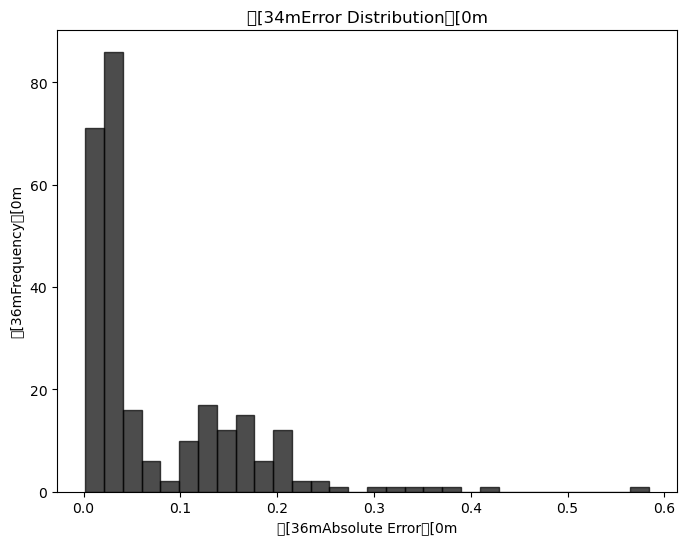

In [15]:
#4.model evalution
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from termcolor import colored

# EXPENSES FOR THE TESTING DATA SET
Xa = np.c_[np.ones((X_test.shape[0], 1)), X_test]
ya = Xa.dot(coefficients)

# calculating MSE AND MAE
ae = np.abs(y_test - ya.flatten())
mae = mean_absolute_error(y_test, ya)
mse = mean_squared_error(y_test, ya)

print(colored("MAE:", 'cyan'), colored(round(mae, 2), 'yellow'))
print("\n" + colored("#" * 50, 'green'))
print(colored("Model Evaluation", 'green'))
print(colored("#" * 50, 'green'))
print(colored("MSE:", 'cyan'), colored(round(mse, 2), 'yellow'))

plt.figure(figsize=(8, 6))

# histogram plot 
plt.hist(ae, bins=30, edgecolor='black', color='black', alpha=0.7)

plt.title(colored("Error Distribution", 'blue'))

# Labels of x-axis and y-axis
plt.xlabel(colored("Absolute Error", 'cyan'))
plt.ylabel(colored("Frequency", 'cyan'))

# Displaying the histogram plot
plt.show()



**************************************************
Updated Coefficients and Intercept
**************************************************
╒═════════════╕
│   Intercept │
╞═════════════╡
│  0.499862   │
├─────────────┤
│  0.200023   │
├─────────────┤
│  0.202365   │
├─────────────┤
│ -1.11219    │
├─────────────┤
│ -0.00291207 │
├─────────────┤
│  0.384023   │
├─────────────┤
│ -0.0050731  │
├─────────────┤
│ -0.0241708  │
├─────────────┤
│ -0.0192914  │
╘═════════════╛

**************************************************
Loss History
**************************************************
╒═════════════╤═══════════╕
│   Iteration │       MSE │
╞═════════════╪═══════════╡
│           0 │ 5.11471   │
├─────────────┼───────────┤
│           1 │ 4.9061    │
├─────────────┼───────────┤
│           2 │ 4.70636   │
├─────────────┼───────────┤
│           3 │ 4.51511   │
├─────────────┼───────────┤
│           4 │ 4.33199   │
├─────────────┼───────────┤
│           5 │ 4.15664   │
├─────────────┼───


Loss History (Dynamic Learning Rate)
╒═════════════╤════════════╕
│   Iteration │        MSE │
╞═════════════╪════════════╡
│           0 │ 0.346463   │
├─────────────┼────────────┤
│           1 │ 0.34103    │
├─────────────┼────────────┤
│           2 │ 0.335976   │
├─────────────┼────────────┤
│           3 │ 0.331268   │
├─────────────┼────────────┤
│           4 │ 0.326879   │
├─────────────┼────────────┤
│           5 │ 0.322782   │
├─────────────┼────────────┤
│           6 │ 0.318953   │
├─────────────┼────────────┤
│           7 │ 0.315369   │
├─────────────┼────────────┤
│           8 │ 0.312011   │
├─────────────┼────────────┤
│           9 │ 0.30886    │
├─────────────┼────────────┤
│          10 │ 0.305898   │
├─────────────┼────────────┤
│          11 │ 0.303112   │
├─────────────┼────────────┤
│          12 │ 0.300485   │
├─────────────┼────────────┤
│          13 │ 0.298006   │
├─────────────┼────────────┤
│          14 │ 0.295662   │
├─────────────┼────────────┤
│    

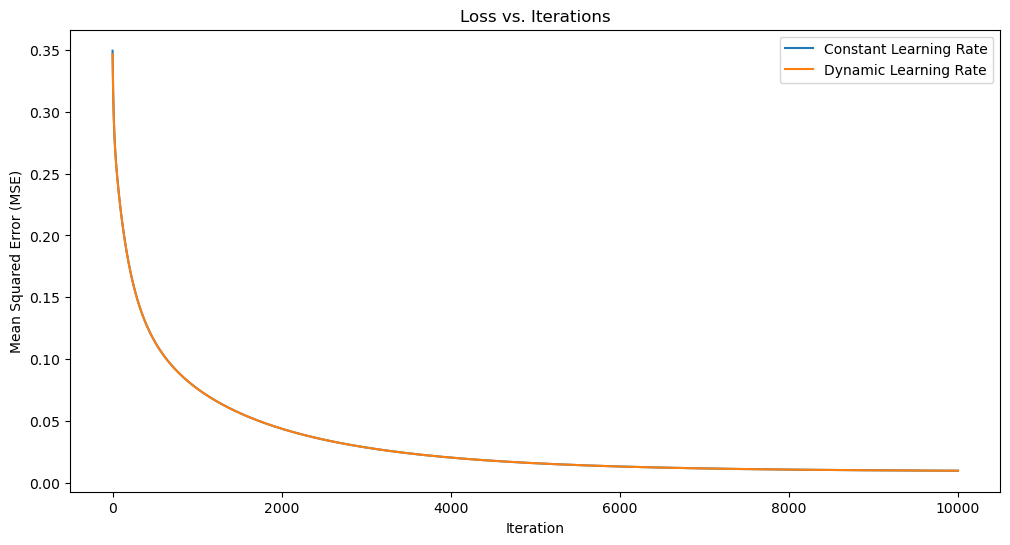

In [19]:
#5.learning rate
import numpy as np
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import matplotlib.pyplot as plt

def exponential_decay(initial_lr, iteration, decay_rate):
    return initial_lr / (1 + decay_rate * iteration)

# Assuming 'extended_features' is your X_b, 'samples_count' is m, 'features_count' is n
# 'learning_rate' is alpha, 'max_iterations' is n_iterations, 'coefficients' is W

X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
m = X_train.shape[0]
n = X_train.shape[1] + 1

alpha_initial = 0.01
max_iterations = 10000   
coefficients_gradient_descent = np.random.randn(n, 1)

# Loss history for constant learning rate
loss_history_constant = []  

# Loss history for dynamic learning rate
loss_history_dynamic = []  

decay_rate = 0.001  # Adjust decay rate as needed

for iteration in range(max_iterations):
    # Updating the coefficients using the constant learning rate
    gradients_constant = 1/m * X_b.T.dot(X_b.dot(coefficients_gradient_descent) - y_train.values.reshape(-1, 1))
    coefficients_gradient_descent = coefficients_gradient_descent - alpha_initial * gradients_constant
    predictions_constant = X_b.dot(coefficients_gradient_descent)
    mse_constant = mean_squared_error(y_train, predictions_constant)
    loss_history_constant.append(mse_constant)

    # Updating the coefficients using the dynamic (exponentially decaying) learning rate
    current_learning_rate = exponential_decay(alpha_initial, iteration, decay_rate)
    gradients_dynamic = 1/m * X_b.T.dot(X_b.dot(coefficients_gradient_descent) - y_train.values.reshape(-1, 1))
    coefficients_gradient_descent = coefficients_gradient_descent - current_learning_rate * gradients_dynamic
    predictions_dynamic = X_b.dot(coefficients_gradient_descent)
    mse_dynamic = mean_squared_error(y_train, predictions_dynamic)
    loss_history_dynamic.append(mse_dynamic)


print("\n" + "=" * 50)
print("Loss History (Dynamic Learning Rate)")
print("=" * 50)
print(tabulate(enumerate(loss_history_dynamic), headers=['Iteration', 'MSE'], tablefmt='fancy_grid'))


print("\n" + "=" * 50)
print("Updated Coefficients and Intercept")
print("=" * 50)
headers_gradient_descent = ['Intercept'] + [f'Feature {i}' for i in range(1, n)]
print(tabulate(coefficients_gradient_descent, headers=headers_gradient_descent, tablefmt='fancy_grid'))

# Plot Loss as a function of Iterations
plt.figure(figsize=(12, 6))
plt.plot(range(max_iterations), loss_history_constant, label='Constant Learning Rate')
plt.plot(range(max_iterations), loss_history_dynamic, label='Dynamic Learning Rate')
plt.title("Loss vs. Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tabulate import tabulate
import numpy as np

# 6.Use scikit-learn LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


predicted_expenses = regression_model.predict(X_test)

# Computing the MAE and MSE for comparison
mae_value = mean_absolute_error(y_test, predicted_expenses)
mse_value = mean_squared_error(y_test, predicted_expenses)

# Displaying the results with attractive formatting
print("\n" + "=" * 60)
print("\033[1m\033[4mScikit-learn Linear Regression\033[0m")
print("=" * 60)


header_names = ["Intercept"] + [f"Feature {i}" for i in range(1, X_train.shape[1] + 1)]
coefficients_values = np.concatenate([[regression_model.intercept_], regression_model.coef_]).reshape(1, -1)
print(tabulate(coefficients_values, headers=header_names, tablefmt='fancy_grid'))

# printing MAE and MSE
print("\n\033[1m\033[4mPerformance Metrics\033[0m")
print("\033[92mMean Absolute Error (MAE):\033[0m", round(mae_value, 4))
print("\033[91mMean Squared Error (MSE):\033[0m", round(mse_value, 4))




Scikit-learn Linear Regression
╒═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│   Intercept │   Feature 1 │   Feature 2 │   Feature 3 │   Feature 4 │   Feature 5 │   Feature 6 │   Feature 7 │   Feature 8 │
╞═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│   -0.221201 │    0.199776 │    0.179569 │    0.378699 │ -0.00429561 │    0.380855 │ -0.00430836 │  -0.0193966 │   -0.017643 │
╘═════════════╧═════════════╧═════════════╧═════════════╧═════════════╧═════════════╧═════════════╧═════════════╧═════════════╛

Performance Metrics
Mean Absolute Error (MAE): 0.0732
Mean Squared Error (MSE): 0.011


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from tabulate import tabulate

#7 Use the normal equation to find the regression line directly
X_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
weights_normal_equation = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y_train.values.reshape(-1, 1))

X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
predictions_normal_equation = X_test_with_bias.dot(weights_normal_equation)

# Computing the  MAE and MSE with normal equation
mae_normal_equation = mean_absolute_error(y_test, predictions_normal_equation)
mse_normal_equation = mean_squared_error(y_test, predictions_normal_equation)

#printing the  results with enhanced formatting
print("\n" + "=" * 60)
print("\033[1m\033[4mNormal Equation Implementation\033[0m")
print("=" * 60)


headers_normal_equation = ["Intercept"] + [f"Feature {i}" for i in range(1, X_train.shape[1] + 1)]
weights_table = tabulate(weights_normal_equation, headers=headers_normal_equation, tablefmt='fancy_grid')


predictions_table = tabulate(predictions_normal_equation.reshape(-1, 1), headers=["Predictions"], tablefmt='fancy_grid')


print(weights_table + "\n" + predictions_table)


print("\n\033[1m\033[4mPerformance Metrics for Normal Equation\033[0m")
print("\033[92mMean Absolute Error (MAE):\033[0m", round(mae_normal_equation, 4))
print("\033[91mMean Squared Error (MSE):\033[0m", round(mse_normal_equation, 4))



Normal Equation Implementation
╒═════════════╕
│   Intercept │
╞═════════════╡
│ -0.221201   │
├─────────────┤
│  0.199776   │
├─────────────┤
│  0.179569   │
├─────────────┤
│  0.378699   │
├─────────────┤
│ -0.00429561 │
├─────────────┤
│  0.380855   │
├─────────────┤
│ -0.00430836 │
├─────────────┤
│ -0.0193966  │
├─────────────┤
│ -0.017643   │
╘═════════════╛
╒═══════════════╕
│   Predictions │
╞═══════════════╡
│    0.207896   │
├───────────────┤
│    0.21264    │
├───────────────┤
│    0.0586103  │
├───────────────┤
│    0.143826   │
├───────────────┤
│    0.0560027  │
├───────────────┤
│    0.021065   │
├───────────────┤
│    0.595851   │
├───────────────┤
│    0.0702541  │
├───────────────┤
│    0.0633572  │
├───────────────┤
│    0.156424   │
├───────────────┤
│    0.561923   │
├───────────────┤
│    0.0686561  │
├───────────────┤
│    0.475536   │
├───────────────┤
│    0.052238   │
├───────────────┤
│    0.147985   │
├───────────────┤
│    0.0182707  │
├───────────────┤
│ 

In [23]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tabulate import tabulate
import numpy as np

# 8 Function to measure time taken by a function
def measure_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        return result, elapsed_time
    return wrapper

# Gradient Descent
@measure_time
def gradient_descent_method(features, target, learning_rate, max_iterations):
    # Add bias term to features
    extended_features = np.c_[np.ones((features.shape[0], 1)), features]
    num_samples, num_features = extended_features.shape
    weight_matrix = np.random.randn(num_features, 1)
    
   
    for iteration in range(max_iterations):
        gradients = 1/num_samples * extended_features.T.dot(extended_features.dot(weight_matrix) - target.values.reshape(-1, 1))
        weight_matrix = weight_matrix - learning_rate * gradients
    
    return weight_matrix

# Scikit-learn
@measure_time
def scikit_learn_method(train_features, train_target, test_features):
    # Use Linear Regression from scikit-learn
    model = LinearRegression()
    model.fit(train_features, train_target)
    predictions = model.predict(test_features)
    return predictions

# Normal Equation
@measure_time
def normal_equation_method(features, target):
   
    extended_features = np.c_[np.ones((features.shape[0], 1)), features]
    weights = np.linalg.inv(extended_features.T.dot(extended_features)).dot(extended_features.T).dot(target.values.reshape(-1, 1))
    return weights

# comparisons
weights_gradient_descent, time_gradient_descent = gradient_descent_method(X_train, y_train, 0.01, 10000)
predictions_scikit_learn, time_scikit_learn = scikit_learn_method(X_train, y_train, X_test)
weights_normal_equation, time_normal_equation = normal_equation_method(X_train, y_train)


X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
predictions_normal_equation = X_test_with_bias.dot(weights_normal_equation)

# calculating MAE and MSE for all methods
mae_gradient_descent = mean_absolute_error(y_test, X_test_with_bias.dot(weights_gradient_descent))
mse_gradient_descent = mean_squared_error(y_test, X_test_with_bias.dot(weights_gradient_descent))

mae_scikit_learn = mean_absolute_error(y_test, predictions_scikit_learn)
mse_scikit_learn = mean_squared_error(y_test, predictions_scikit_learn)

mae_normal_equation = mean_absolute_error(y_test, predictions_normal_equation)
mse_normal_equation = mean_squared_error(y_test, predictions_normal_equation)


print("\n" + "=" * 80)
print("\033[1m\033[4mComparison of Methods\033[0m".center(80))
print("=" * 80)


table_headers = ["Method", "MAE", "MSE", "Time (s)"]
table_data = [
    ["Gradient Descent", round(mae_gradient_descent, 4), round(mse_gradient_descent, 4), round(time_gradient_descent, 4)],
    ["Scikit-learn", round(mae_scikit_learn, 4), round(mse_scikit_learn, 4), round(time_scikit_learn, 4)],
    ["Normal Equation", round(mae_normal_equation, 4), round(mse_normal_equation, 4), round(time_normal_equation, 4)]
]


table_format = 'fancy_grid'
header_colors = ['cyan', 'cyan', 'cyan', 'cyan']
colored_headers = [f"\033[1;{color}m{header}\033[0m" for color, header in zip(header_colors, table_headers)]
print(tabulate(table_data, headers=colored_headers, tablefmt=table_format))



                       Comparison of Methods                        
╒══════════════════╤════════╤════════╤════════╕
│ yanmMethod                  │        yanmMAE │        yanmMSE │        yanmTime (s) │
╞══════════════════╪════════╪════════╪════════╡
│ Gradient Descent │ 0.0726 │ 0.0115 │ 0.1228 │
├──────────────────┼────────┼────────┼────────┤
│ Scikit-learn     │ 0.0732 │ 0.011  │ 0.003  │
├──────────────────┼────────┼────────┼────────┤
│ Normal Equation  │ 0.0732 │ 0.011  │ 0.001  │
╘══════════════════╧════════╧════════╧════════╛
